<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/Covid_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


# **Country Comparison**

***1. Which countries have the highest total cases and death ?      ***

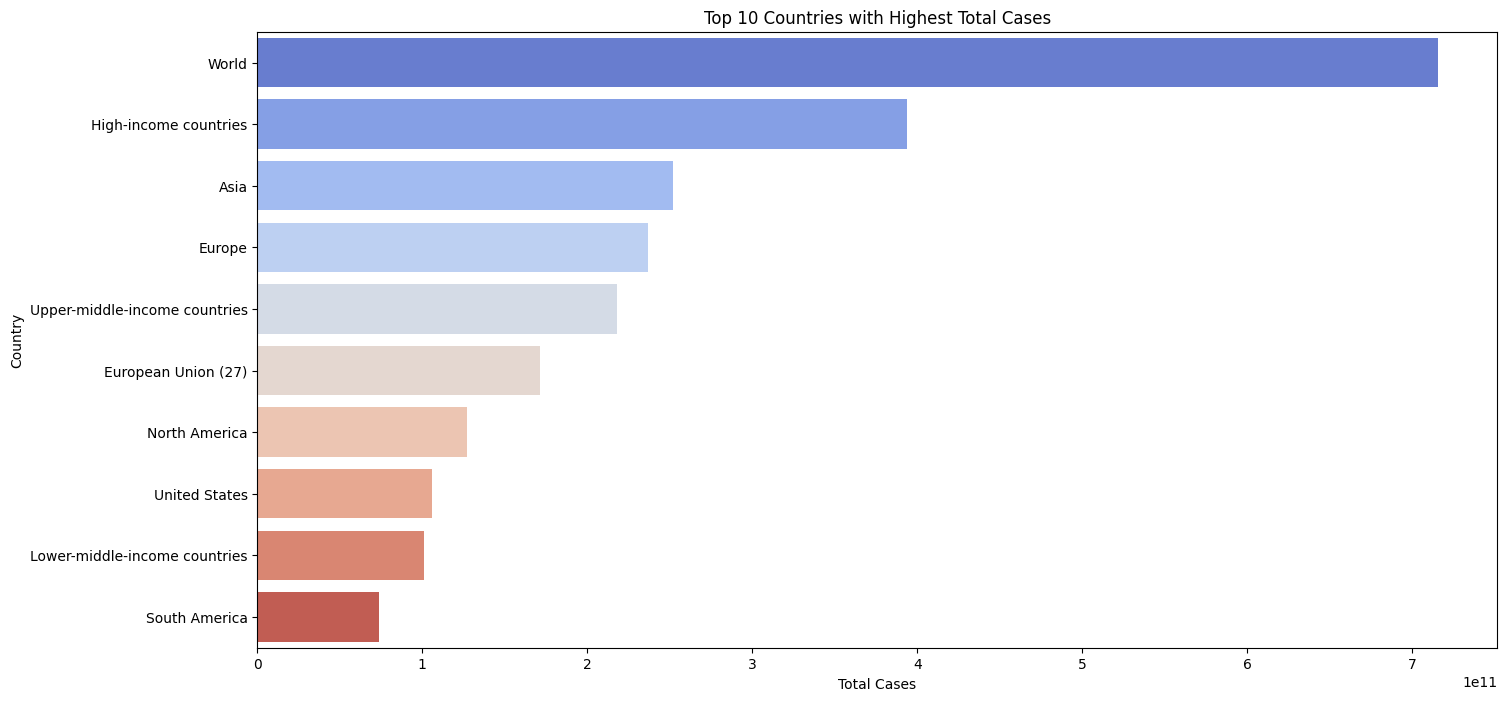

In [ ]:
total_cases = df.groupby('location')['total_cases'].sum()
total_deaths = df.groupby('location')['total_deaths'].sum()
plt.figure(figsize=(16,8))
sns.barplot(y=total_cases.sort_values(ascending=False).head(10).index, x=total_cases.sort_values(ascending=False).head(10).values, palette='coolwarm')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Total Cases')
plt.show()


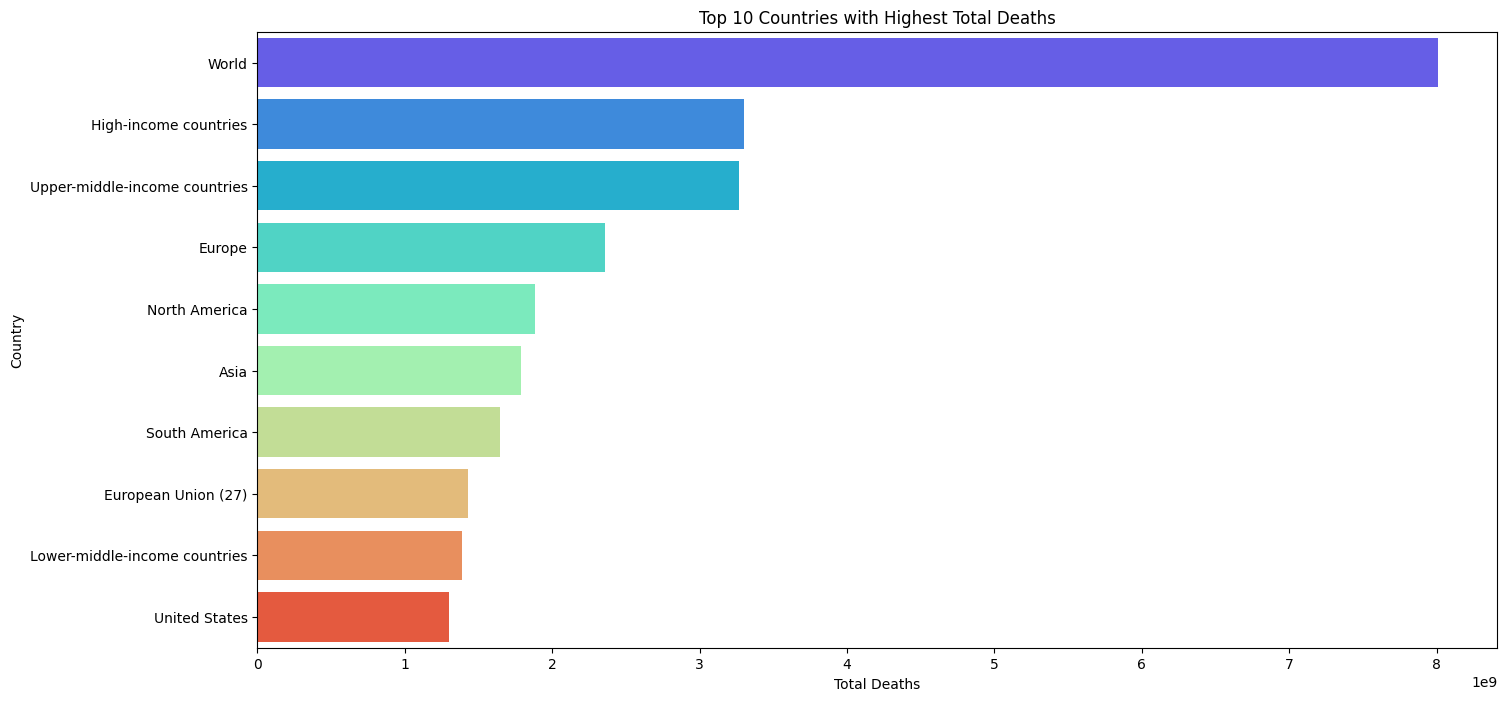

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(y=total_deaths.sort_values(ascending=False).head(10).index, x=total_deaths.sort_values(ascending=False).head(10).values, palette='rainbow')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Total Deaths')
plt.show()

**2. Death Rate (deaths / total cases)**

In [ ]:
df['death_rate'] = df['total_deaths'] / df['total_cases']
df.sort_values('death_rate', ascending=False)
df['death_rate'].dropna()

,death_rate
56,0.000000
57,0.000000
58,0.000000
59,0.000000
60,0.000000
...,...
429430,0.021548
429431,0.021548
429432,0.021548
429433,0.021548


***3. Which countries have the highest number of new cases ?  ***

In [ ]:
Highest_New_Cases = df.groupby('location')['new_cases'].sum()
Highest_New_Cases.sort_values(ascending=False).head(10)

,new_cases
location,
World,775935057.0
High-income countries,429044052.0
Asia,301564180.0
Europe,252916868.0
Upper-middle-income countries,251756125.0
European Union (27),185822587.0
North America,124492698.0
United States,103436829.0
China,99373219.0


# **Daily Trends**

**1. What is the 7-day moving average of new cases and deaths ?**

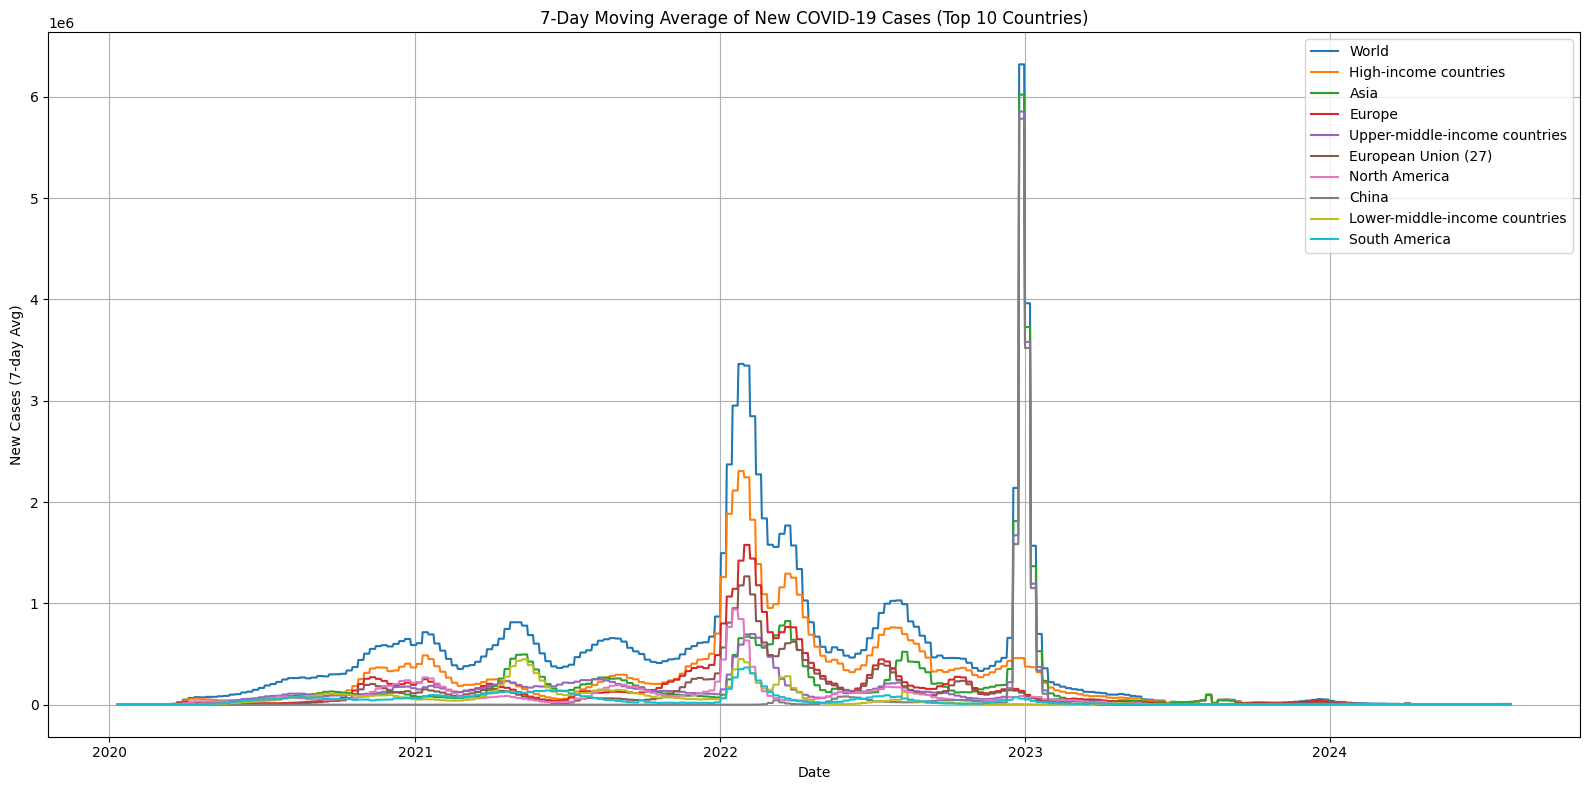

In [ ]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Step 2: Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 3: Filter rows with valid 'new_cases' and 'total_cases'
df = df[['location', 'date', 'new_cases', 'total_cases']].dropna(subset=['new_cases', 'total_cases'])

# Step 4: Get top 10 countries by latest total_cases
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top_countries = latest_data.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10).index.tolist()

# Step 5: Calculate 7-day moving average
df = df[df['location'].isin(top_countries)]
df = df.sort_values(['location', 'date'])
df['7_day_avg'] = df.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())

# Step 6: Plot
plt.figure(figsize=(16,8))
for country in top_countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['7_day_avg'], label=country)

plt.title('7-Day Moving Average of New COVID-19 Cases (Top 10 Countries)')
plt.xlabel('Date')
plt.ylabel('New Cases (7-day Avg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Which day had the highest number of new cases globally or in a country ?**

Day with the Highest Number of New Cases Globally.

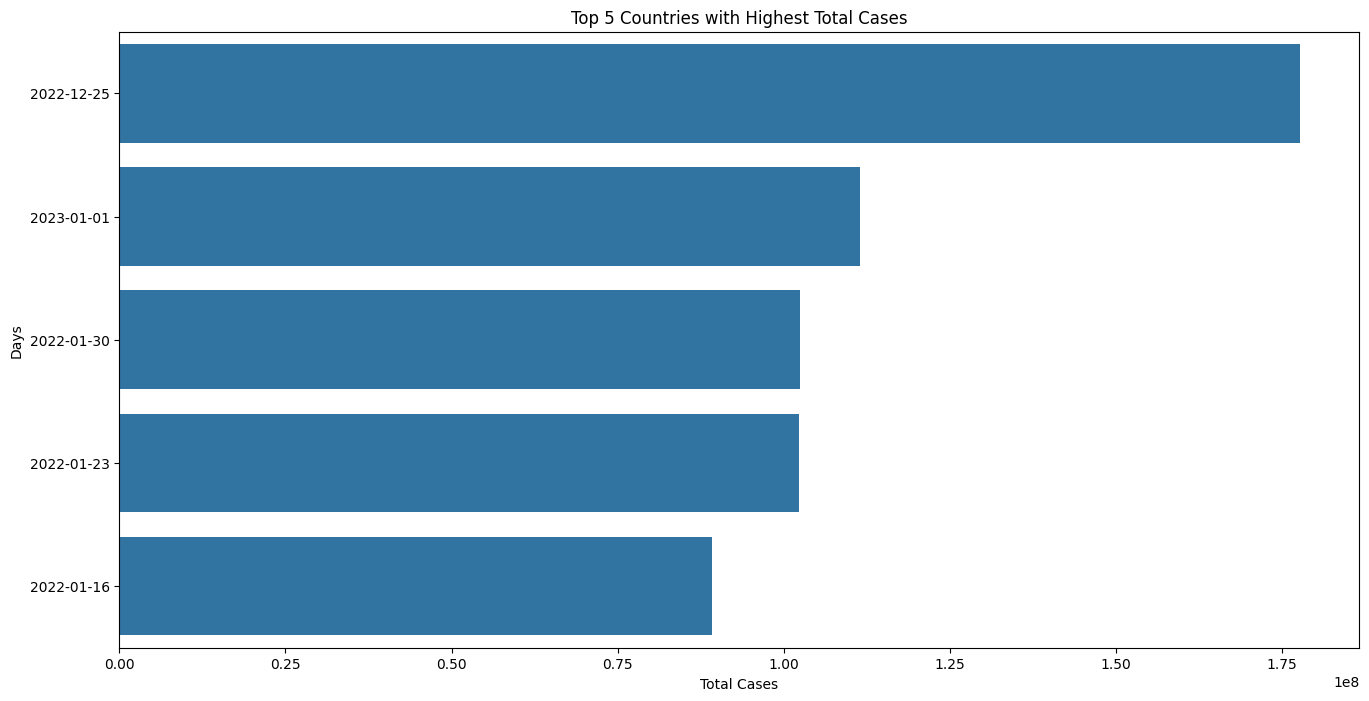

In [ ]:
day = df.groupby('date')['new_cases'].sum()
day_sorted = day.sort_values(ascending=False).head(5)
plt.figure(figsize=(16,8))
sns.barplot(x=day_sorted.values, y=day_sorted.index)
plt.xlabel('Total Cases')
plt.ylabel('Days')
plt.title('Top 5 Countries with Highest Total Cases')
plt.show()

Day with the Highest Number of New Cases for Each Country.

          Country   Peak Date  Peak New Cases
0     Afghanistan  2021-06-27         12314.0
1          Africa  2022-01-09        316014.0
2         Albania  2022-01-23         15405.0
3         Algeria  2022-01-30         14774.0
4  American Samoa  2022-03-27          1881.0


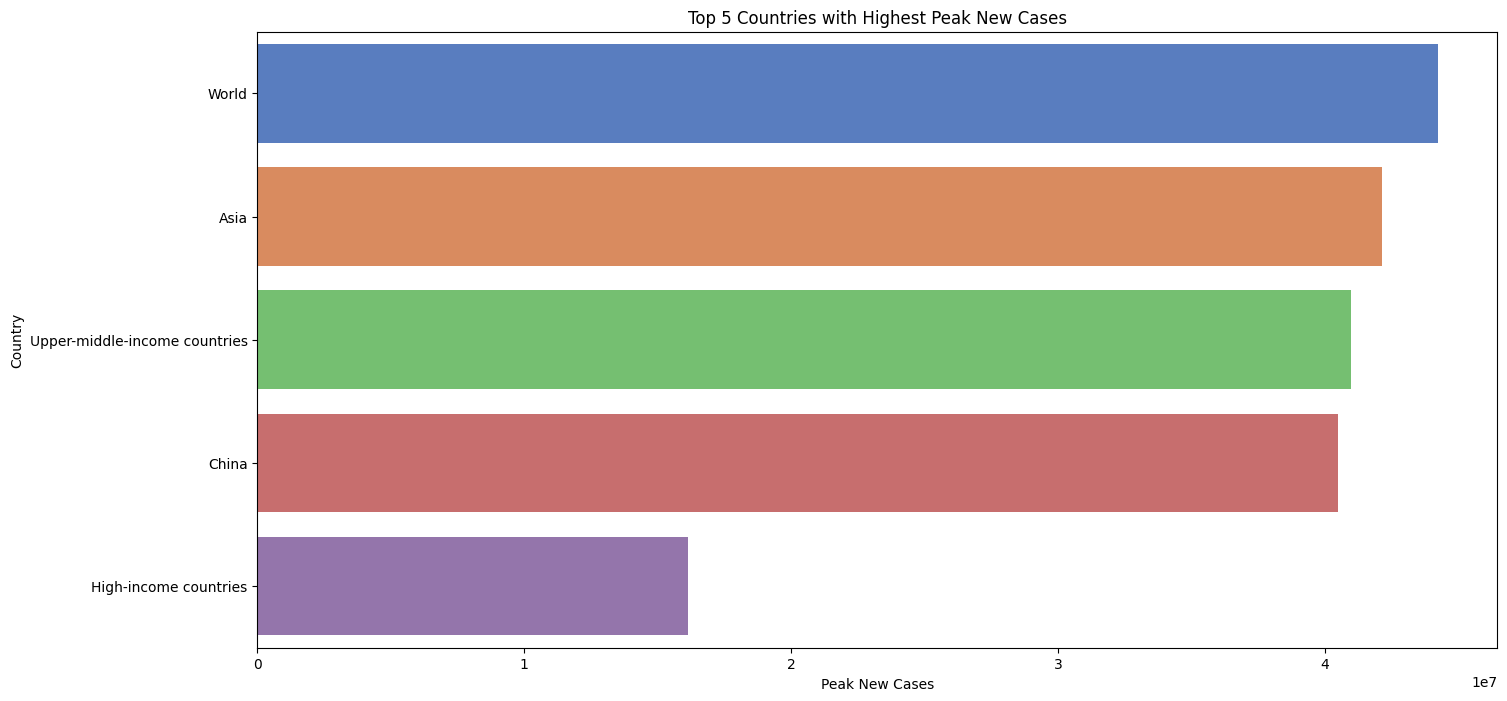

In [ ]:
# Step 1: Group by loca and date, sum new cases
country_day_cases = df.groupby(['location', 'date'])['new_cases'].sum()

# Step 2: For eachloca, find the date with maximum new cases
peak_dates = country_day_cases.groupby('location').idxmax()

# Step 3: For eachloca, get the value (i.e., max new cases on that date)
peak_cases = country_day_cases.groupby('location').max()

# Step 4: Create a clean DataFrame
import pandas as pd

# Extract just the date part from the 'location', date tuple in idxmax
peak_dates_clean = [date for (location, date) in peak_dates]

# Final DataFrame
peak_df = pd.DataFrame({
    'Country': peak_cases.index,
    'Peak Date': peak_dates_clean,
    'Peak New Cases': peak_cases.values
})

print(peak_df.head())
plt.figure(figsize=(16,8))
top5 = peak_df.sort_values('Peak New Cases', ascending=False).head(5)
sns.barplot(x='Peak New Cases', y='Country', data=top5,palette = 'muted')
plt.xlabel('Peak New Cases')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest Peak New Cases')
plt.show()

# **Mortality and Recovery**

1. What is the case fatality rate across different countries ?

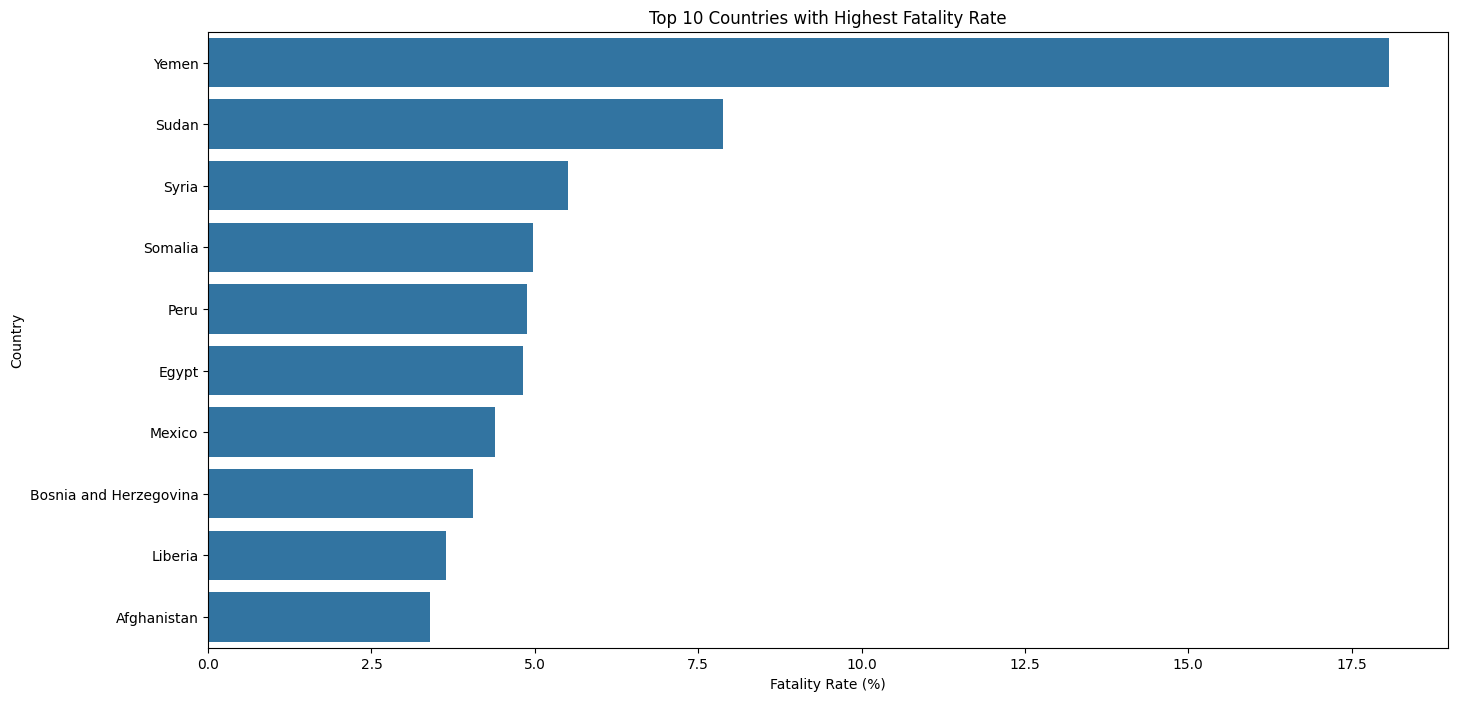

In [ ]:
# Group by country to get the latest totals
country_df = df.groupby('location').agg({'total_cases': 'max', 'total_deaths': 'max'}).reset_index()

# Calculate fatality rate
country_df['Fatality_Rate'] = (country_df['total_deaths'] / country_df['total_cases']) * 100

# Filter countries with at least some cases and deaths
country_df = country_df[(country_df['total_cases'] > 0) & (country_df['total_deaths'].notna())]

# Get top 10
top_10 = country_df.sort_values('Fatality_Rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(16,8))
sns.barplot(x='Fatality_Rate', y='location', data=top_10)
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Fatality Rate')
plt.show()

2. How does the death rate correlate with total cases ?

In [19]:
df['death_rate'] = (df['total_deaths'] / df['total_cases'])*100
df['death_rate']
df['death_rate'].dropna()
latest_df = df.sort_values('date').groupby('location').last()
latest_df = latest_df[latest_df['total_cases'] > 1000]
correlation = latest_df['total_cases'].corr(latest_df['death_rate'])
print(f"The correlation between total cases and death rate is: {correlation}")


The correlation between total cases and death rate is: -0.04689013624403842


# **Population vs Impact**

1. How does the number of cases per million population compare across countries ?

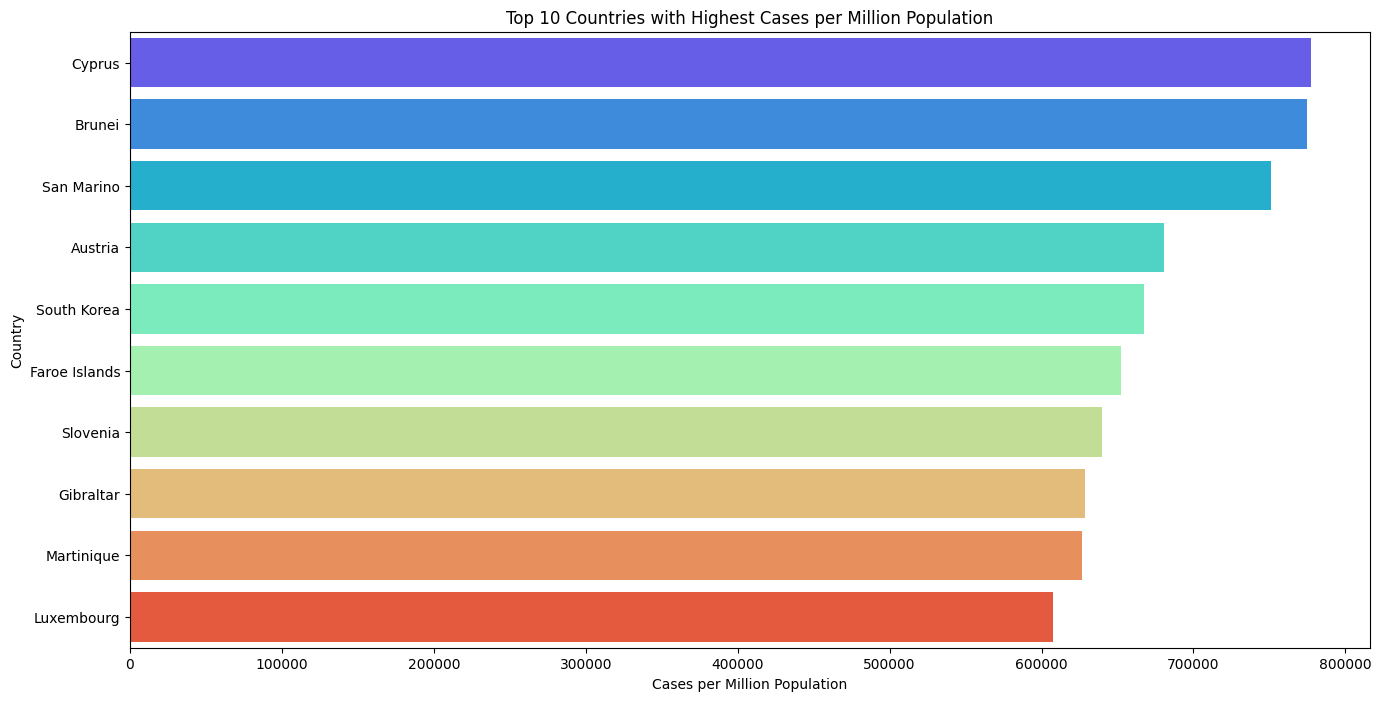

In [ ]:
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1000000
df['cases_per_million'].dropna().sort_values(ascending=False).head(10)
cases_per_million = df.groupby('location')['cases_per_million'].max()
cases_per_million.sort_values(ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(x=cases_per_million.sort_values(ascending=False).head(10).values, y=cases_per_million.sort_values(ascending=False).head(10).index, palette='rainbow')
plt.xlabel('Cases per Million Population')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Cases per Million Population')
plt.show()

# **Vaccination Impact**

1. How do Vaccination rates correlate with new case trends ?

The correlation between new cases and vaccination rate is: 0.010684215207101605
Below is the a histogram to know the trend of vaccination rate.


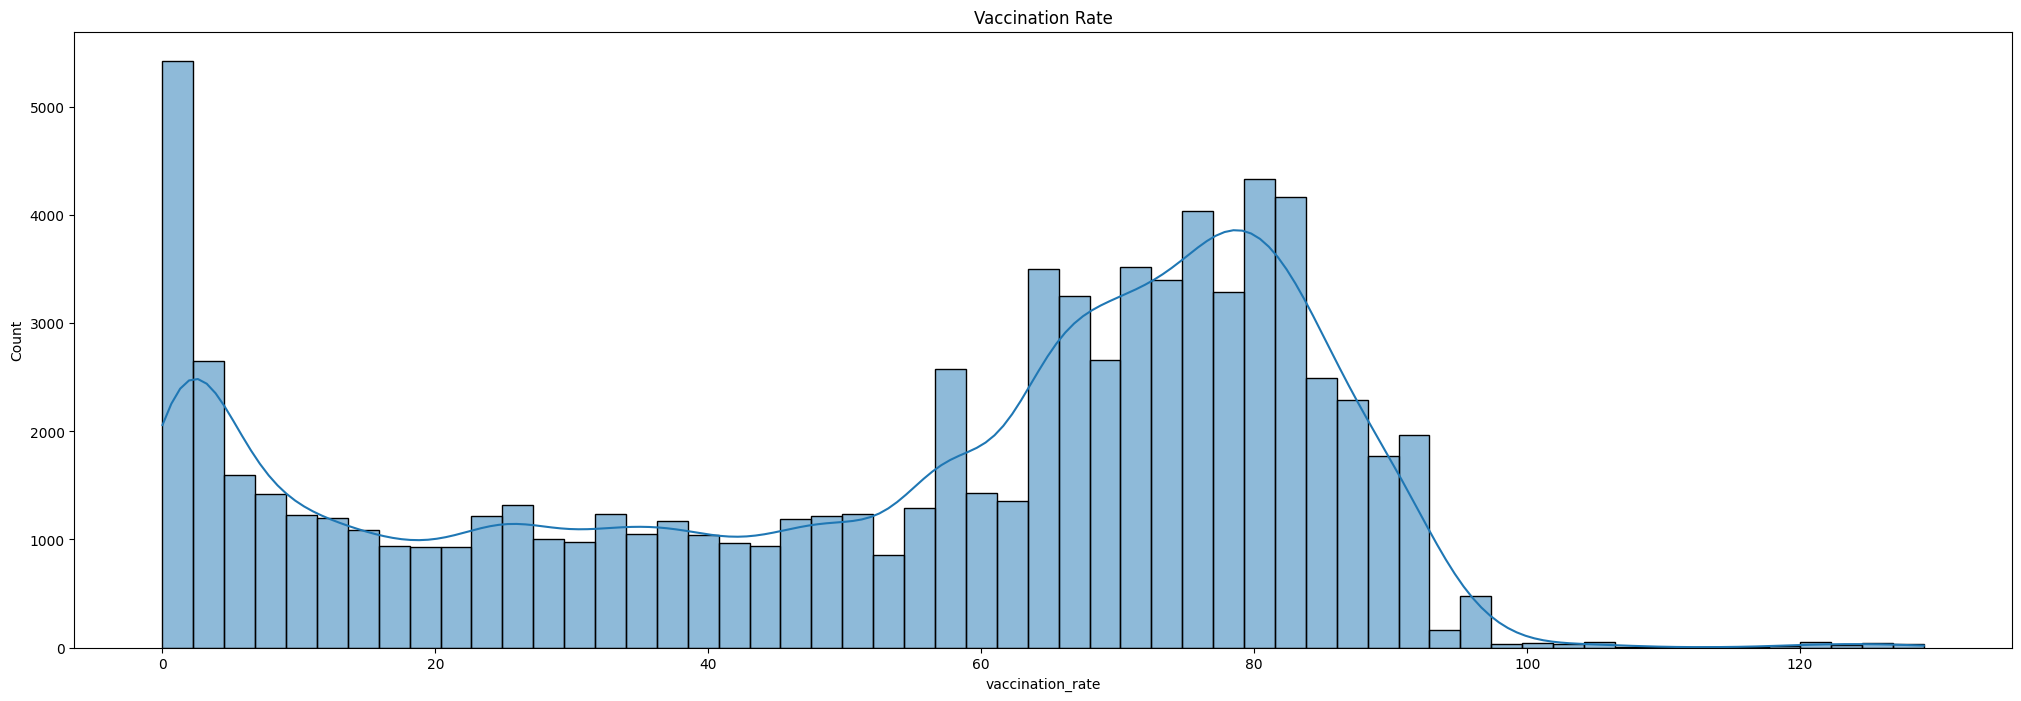

In [ ]:
df['vaccination_rate'] = (df['people_vaccinated'] / df['population']) * 100
df['vaccination_rate'].dropna()

correlation = df['new_cases'].corr(df['vaccination_rate'])
print(f"The correlation between new cases and vaccination rate is: {correlation}")
print("Below is the a histogram to know the trend of vaccination rate.")
plt.figure(figsize=(25,8))
plt.title('Vaccination Rate')
sns.histplot(df['vaccination_rate'], kde=True)                    #kde is kernel density estimator Bell Curve - used to check the skewness.
plt.show()

2. Do vaccinated countries show a decline in death rates ?

In [ ]:
print(latest_df.columns.tolist())

['iso_code', 'continent', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per

In [21]:
latest_df = df[df['date'] == df['date'].max()]
#✅ This ensures you keep all original columns — including 'location'.

#🧪 2. Double check that location is present:
print(latest_df.columns.tolist())
#Make sure 'location' is now in the list.

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

# **Correlation Analysis**

1. Is there a correlation between new cases and new deaths ?

The correlation between new cases and new deaths is: 0.50572313442241


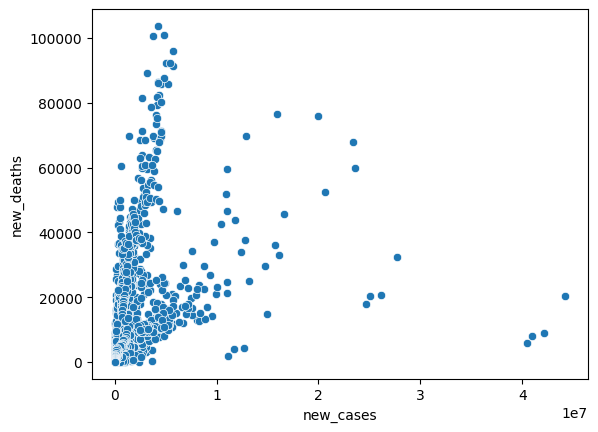

In [ ]:
correlation = df['new_cases'].corr(df['new_deaths'])
print(f"The correlation between new cases and new deaths is: {correlation}")
sns.scatterplot(x='new_cases', y='new_deaths', data=df)
plt.show()

There is a positive correlation between new cases and new deaths.

2. Are total tests correlated with total cases ?

The correlation between total tests and total cases is: 0.8593007398257893


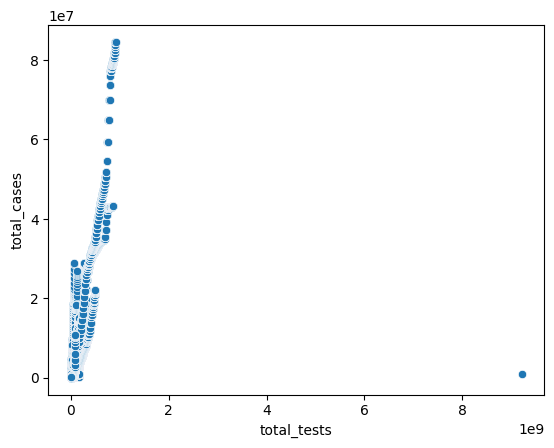

In [ ]:
correlation = df['total_tests'].corr(df['total_cases'])
print(f"The correlation between total tests and total cases is: {correlation}")
sns.scatterplot(x='total_tests', y='total_cases', data=df)
plt.show()

There is a positive correlation between total tests and total cases.

# **Data Quality Checks**

In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])


# Check for negative values in numeric columns (often invalid for metrics like cases/deaths)
numeric_cols = df.select_dtypes(include='number')
neg_values = (numeric_cols < 0).sum()
print("\nNegative values in numeric columns:")
print(neg_values[neg_values > 0])



Missing values per column:
continent                                   26525
total_cases                                 17631
new_cases                                   19276
new_cases_smoothed                          20506
total_deaths                                17631
                                            ...  
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
new_cases_diff                              19327
Length: 64, dtype: int64

Negative values in numeric columns:
reproduction_rate                            178
excess_mortality_cumulative_absolute        2551
excess_mortality_cumulative                 2550
excess_mortality                            3965
excess_mortality_cumulative_per_million     2551
new_cases_diff                             41758
dtype: int64


## 🔁 Correlation Analysis

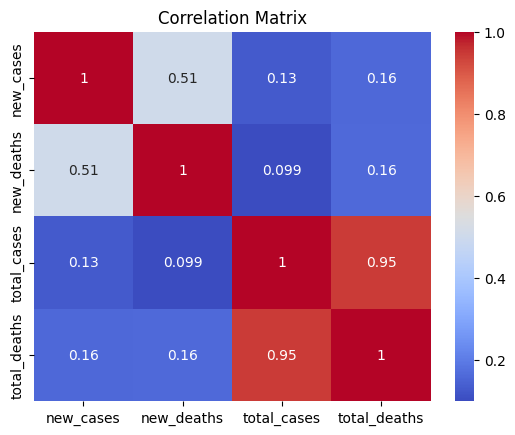

In [7]:
corr = df[['new_cases', 'new_deaths', 'total_cases', 'total_deaths']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 🧠 Key Insights

- Countries with higher vaccination tend to have lower fatality rates.
- Correlation between new cases and deaths is strong in many regions.
- Missing data exists for some countries—watch out for biases.
- Rolling averages smooth daily noise and show real trends.
